In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [14]:
path = 'Data/'
tesla_csv = pd.read_csv(path + 'TSLA.csv').drop(columns=['Adj Close'])

In [15]:
tesla_csv.head()

,Date,Open,High,Low,Close,Volume
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,142981500
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,266677500
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,151995000
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,268231500
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,467164500


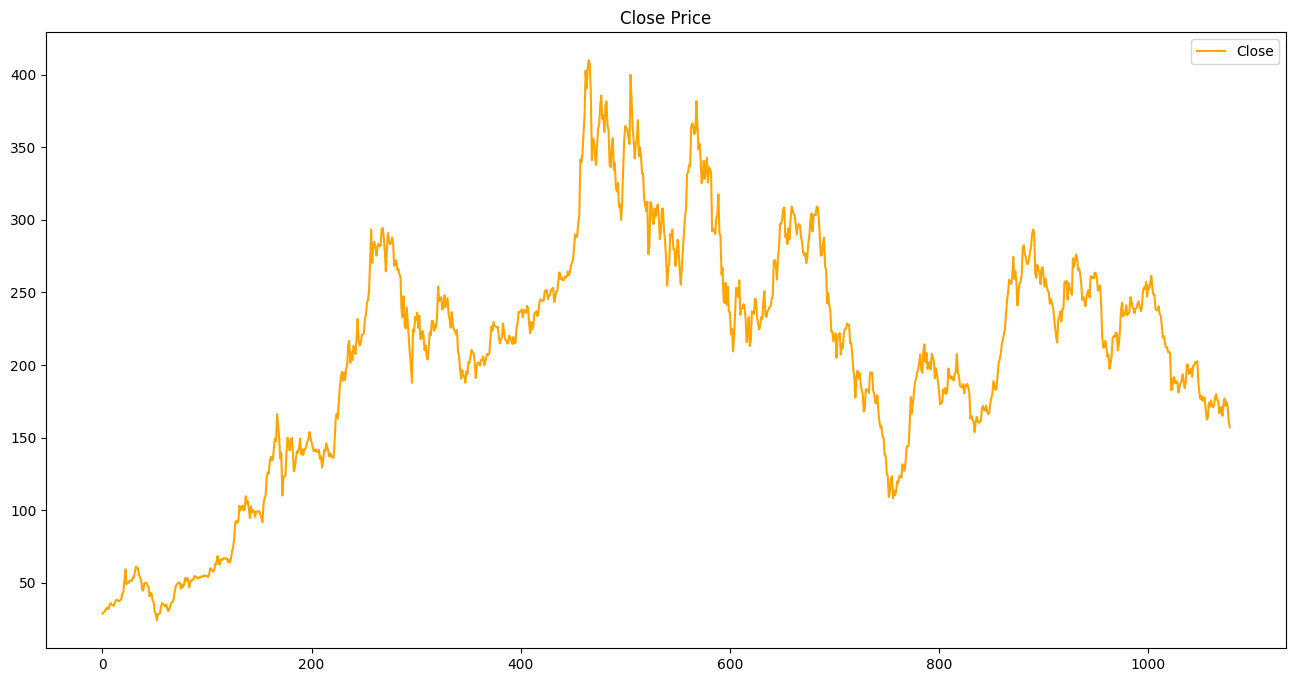

In [5]:
tesla_csv['Close'].plot(label='Close',figsize=(16,8),title='Close Price', color='orange')
plt.legend()
plt.show()

In [6]:
# Convert the 'Date' column to datetime format
tesla_csv['Date'] = pd.to_datetime(tesla_csv['Date'])

# Extract year, month, and day to new columns
# tesla_csv['Year'] = tesla_csv['Date'].dt.year
# tesla_csv['Month'] = tesla_csv['Date'].dt.month
# tesla_csv['Day'] = tesla_csv['Date'].dt.day

# Now you can drop the original 'Date' column
tesla_csv = tesla_csv.drop('Date', axis=1)

# Create a new column that indicates whether the stock price went up or down comparing Open and Close prices each day
tesla_csv['Tomorrow_tendency'] = (tesla_csv['Close'] - tesla_csv['Open']).apply(lambda x: 1 if x > 0 else 0)
tesla_csv['Tomorrow_tendency'] = tesla_csv['Tomorrow_tendency'].shift(-1)
tesla_csv['Tomorrow_Open'] = tesla_csv['Open'].shift(-1)
tesla_csv.dropna(inplace=True)

In [7]:
# Split the data into features (X) and target (y)
X = tesla_csv.drop('Tomorrow_tendency', axis=1)
y = tesla_csv['Tomorrow_tendency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [9]:
import statsmodels.api as sm
X_bis = sm.add_constant(X)
model = sm.Logit(y, X_bis)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.687739
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      Tomorrow_tendency   No. Observations:                 1078
Model:                          Logit   Df Residuals:                     1071
Method:                           MLE   Df Model:                            6
Date:                Sun, 21 Apr 2024   Pseudo R-squ.:                0.007780
Time:                        14:47:30   Log-Likelihood:                -741.38
converged:                       True   LL-Null:                       -747.20
Covariance Type:            nonrobust   LLR p-value:                   0.07083
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1928      0.315      0.611      0.541      -0.425       0.811
Open              0.

In [10]:
# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=300, max_depth=3, random_state=34)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

In [11]:
# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.42592592592592593
